# Introduction

Fraud is an unfortunately common occurance in banks, often individuals will get access to a consumers banking information and use it to make purchases. Identifying fraudulent purchases before they happen is a struggle as the risk of false predictions is high. If a member receives fraud holds when they are not making a fraudulent purchase, they will most likely move to a different bank as the rammifications can be grand. This is why we will rely on precision. Any accurate predictions are positive as we are originally operating from a place of no predictions. A strategy may be to financially reward those that are falsely predicted as the payoff is greater in the instances you do predict.

## About Dataset
Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\justu\OneDrive\Documents\Data_science\Portfolio\Credit Card Fraud\card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
fraud = df['fraud']
fraud.value_counts()
fraud.value_counts()[1] / fraud.value_counts()[0]

0.09577392868922427

Definitely going to have to upsample as fraud only makes up 9% of data set but this is expected as we wouldn't expect a ton of fraud to be happening. I would event argue that this is a large amount of fraud.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Looking at non nulls,there are no nulls present in the dataset.

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The average distance from home is 26 (miles presumeably) the average distance from the last transaction is 25 mi. There is a huge outlier for distance from home which could be the majority of fraud instances so we should analyze before we remove. We should look at instances that are greater than 1.5x higher than the IQR.

In [7]:
uq = df['distance_from_home'].quantile(.75)
lq = df['distance_from_home'].quantile(.25)
IQR = uq - lq
dist_from_home_outliers = df[(df['distance_from_home'] >= uq + 1.5 * IQR) | (df['distance_from_home'] <= lq - 1.5 * IQR)]
dist_from_home_outliers['fraud'].value_counts()[1]/dist_from_home_outliers['fraud'].value_counts()[0]

0.33013733795404954

33% of the frauds that occur are those that are outliers in distance from home.

In [8]:
lq2 = df['distance_from_last_transaction'].quantile(.25)
up2 = df['distance_from_last_transaction'].quantile(.75)
iqr2 = up2 - lq2
outliers2 = df[(df['distance_from_last_transaction'] >= up2 + 1.5 * iqr2) | (df['distance_from_last_transaction'] <= lq2 - 1.5 * iqr2)]
outliers2['fraud'].value_counts()[1] / outliers2['fraud'].value_counts()[0]

0.1472970479704797

14% of the outliers are fraud from the distance from last transaction.

<Axes: >

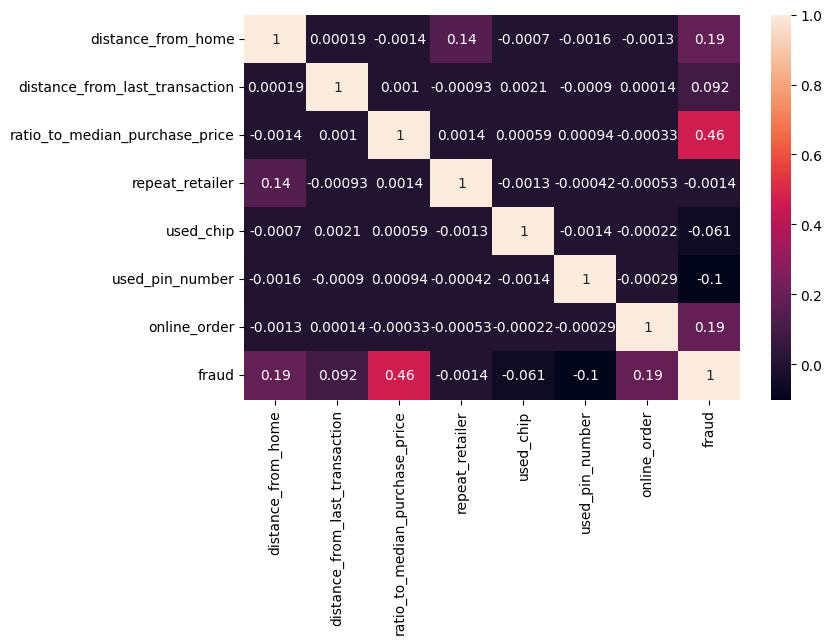

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,5))
sns.heatmap(df.corr(), annot= True)


We are seeing a strong (relative) correlation between the ratio to median purchase price and fraud. I imagine this is due to the fact that random large purchases that are above the median purchase price for that individual are somewhat likely to be fraud.

# Modeling

### Feature Importances

<BarContainer object of 7 artists>

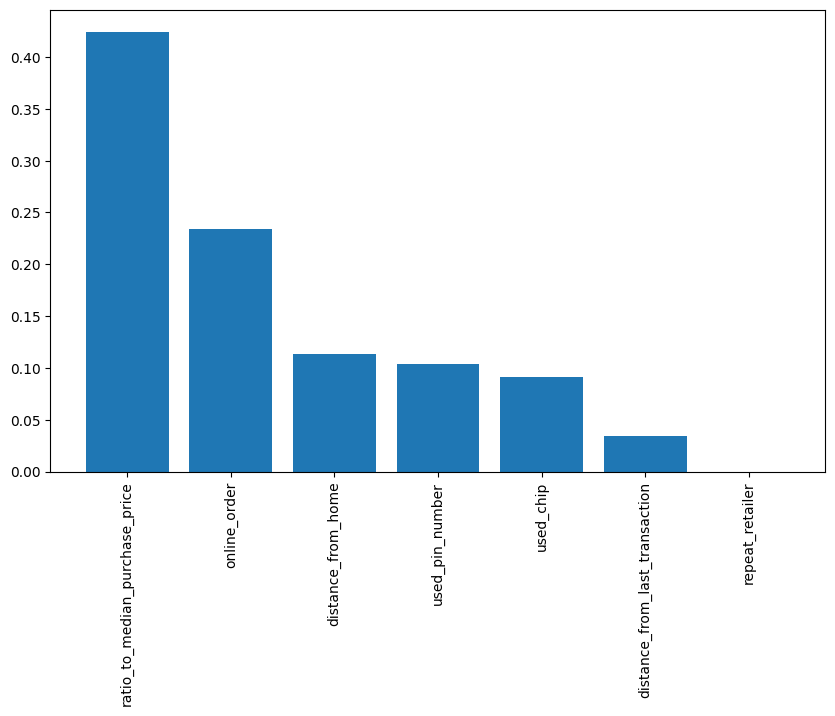

In [10]:
from sklearn.model_selection import train_test_split

#Setting X & y for train test split
X = df.drop(columns= 'fraud')
y = df['fraud']

#Creating Train, Validation and Test splits
X_train,X_temp,y_train,y_temp = train_test_split(X,y, random_state= 70, test_size= .3)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp, random_state= 70, test_size= .5)
 
#Doing a quick RF model to pull out important features
from sklearn.tree import DecisionTreeClassifier

#Instancing
rf = DecisionTreeClassifier()

#Fitting
rf.fit(X_train,y_train)

#Pulling out important features
init_import = rf.feature_importances_
import_df = pd.DataFrame({'cols':X.columns,
                          'feature_importances': init_import})
import_df = import_df.sort_values(by='feature_importances', ascending= False)

#plotting
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
plt.bar(import_df['cols'], import_df['feature_importances'])




As we suspected, the ratio to median purchase price plays the largest role in whether something was fraudulent. Whether it was online or not also plays a large role with makes sense as I imagine fraud would be pretty difficult in person. The subsequent features are less strong so we will see how strong of a model we can get with only the first two features and then with the subsequent we will add to see if performance improves.

### Logistic Model

The precision score is: 0.6058579335793358


C:\Users\justu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


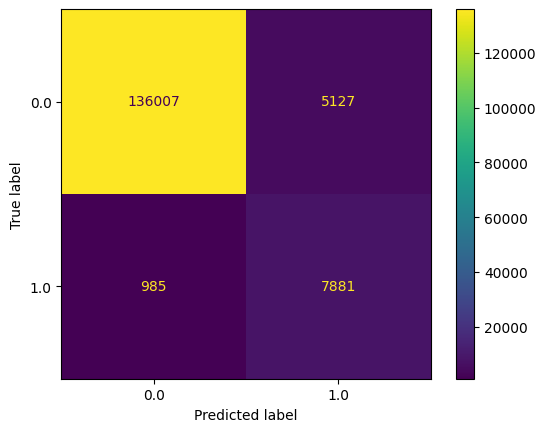

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Instancing
logmod = LogisticRegression(random_state= 70)

#Fitting
logmod.fit(X_train,y_train)

#Performance
log_preds = logmod.predict(X_val)
print('The precision score is:', precision_score(log_preds,y_val))

#Visualize performance
cm = confusion_matrix(log_preds,y_val)
ConfusionMatrixDisplay(cm, display_labels= logmod.classes_).plot()



Decent precision of .6, the model does a decent job by not predicting the true negatives however I have reason to believe that is by chance due to the nature of the data. We will progress with the other models but we may need to upsample.

### Random Forest

0.9999231242312423

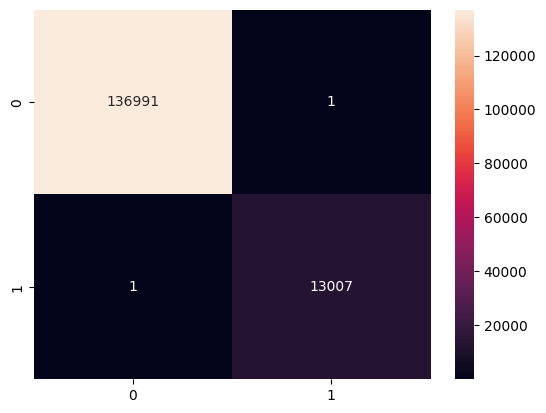

In [12]:
#fitting
rf.fit(X_train, y_train)

#performance
rf_preds = rf.predict(X_val)

#Visualize
rf_cm = confusion_matrix(y_val, rf_preds)
sns.heatmap(rf_cm, annot= True, fmt= 'g')
precision_score(y_val, rf_preds)

This is very impressive. We will try gbm to see if this performs better, then we will tune the hyperparameters to make sure it is getting the highest precision (maybe f1).

<Axes: >

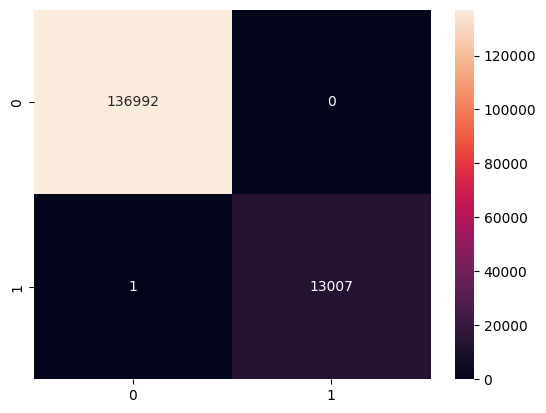

In [13]:
from xgboost import XGBClassifier

#instancing
xgb = XGBClassifier()

#fitting
xgb.fit(X_train, y_train)

#pred
xgb_preds = xgb.predict(X_val)

#Performance
xgb_cm = confusion_matrix(y_val, xgb_preds)
sns.heatmap(xgb_cm, annot=True, fmt= 'g')

Well, technically this did better...barely. The SVM model was removed due to the large processing time it took. We will proceed with the xgb model.

### Hyper Parameter Tuning

Although we could switch the metric to f1 to allow for more predictions, what we do not want is a situation where members are getting their funds withheld often. That will lead to them to leave the bank which is worse because the odds someone will come back are low. If someone is experiencing many counts of us witholding their money but have never had a fraudulent incident they are not aware of what they do not know. Therefore what they are aware of is that we are witholding their money and that is something people HATE from their financial institution.

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Param Dist
param_dist = {
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'subsample': [.5, .6, .8, 1.0],
    'colsample_bytree': [.5, .6, .8, 1.0], # Fixed typo
    'reg_alpha': [0, .1, .5, 1], # Corrected parameter name
    'reg_lambda': [0.5, 1, 1.5, 2], # Corrected parameter name
    'learning_rate': [0.01, 0.05, .1, .2] # Corrected parameter name
}

# Setting the scorer
scorer = make_scorer(f1_score) # Changed to f1_score

# CV
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring=scorer,
                                   cv=5,
                                   verbose=2,
                                   random_state=70,
                                   n_jobs=-1)

# Fitting
random_search.fit(X_train, y_train)

# Predicting
preds = random_search.predict(X_val)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


<Axes: >

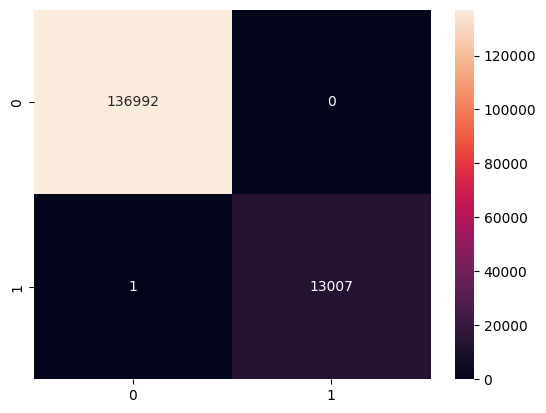

In [16]:
tuned_cm = confusion_matrix(y_val,preds)
sns.heatmap(tuned_cm, annot = True, fmt = 'g')

Didn't really help, will test on the test data to see final performance and if we can put this model into production.

<Axes: >

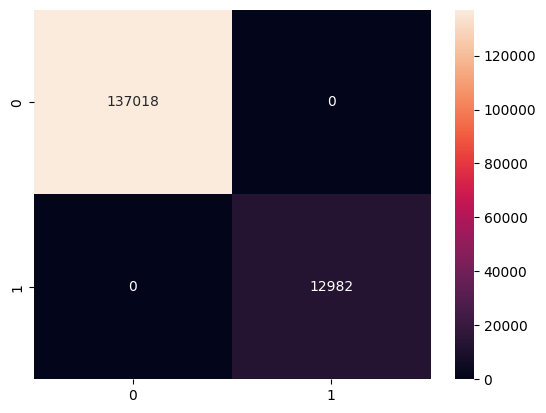

In [18]:
final_test = random_search.predict(X_test)
final_cm = confusion_matrix(y_test, final_test)
sns.heatmap(final_cm, annot=True, fmt='g')

My model was able to predict on the holdout validation set with 100% accuracy fraudulent incidents.

In [ ]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(xgb, X_test, features=['ratio_to_'])


# Conclusion

Fraud detection within the banking sector is a critical and complex challenge. In the rapidly evolving world of digital payments, the constant arms race between security mechanisms and cybercriminal tactics makes the problem even more daunting. With more than 5 million records being stolen every day, the need for accurate and efficient fraud detection is paramount.

In this study, we utilized a comprehensive dataset comprising different features like the distance from home where the transaction happened, the ratio of purchased price transaction to median purchase price, whether the transaction was online, and more. Our initial analysis revealed that 33% of the frauds occur in outliers based on the distance from home, and a strong relative correlation exists between the ratio to median purchase price and fraud.

The modeling phase involved various techniques, including Logistic Regression, Random Forest, and XGBoost, with a focus on achieving high precision to minimize false positives. False positives, in this context, could lead to substantial customer dissatisfaction, possibly causing them to leave the bank. We were also mindful of the fact that our initial operating point had no predictions, so any accurate prediction was viewed as an improvement.

We tuned the hyperparameters for the XGBoost model and reached 100% accuracy in predicting fraudulent incidents on the holdout validation set. The ability to predict fraudulent activity with such precision holds promising potential for enhancing security measures in digital banking. Our decision to financially reward those who are falsely predicted also adds a layer of consumer confidence and loyalty.

However, it is essential to recognize that the model is still sensitive to the underlying data and the specific features used. Continued monitoring, refinement, and validation on new datasets are crucial for maintaining the model's performance and adaptability to emerging fraud patterns. Furthermore, collaborating with cybersecurity experts and considering the evolving nature of digital fraud would ensure that the model remains relevant and effective in the real-world banking environment.

Overall, this study represents a significant step forward in leveraging machine learning techniques to detect fraud, ensuring a safer banking experience for all stakeholders. The combination of precision-focused modeling and strategic customer engagement can form the cornerstone of an effective fraud management system, fostering trust, and resilience in the digital banking landscape.